# Box Plots: Three Models

**Author:** Nipun Gunawardena

**Purpose:** Create box plots for paper v2 with Random Forest Regression

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [20]:
df15 = pd.read_excel('1_15_3mod.xlsx')
df27 = pd.read_excel('1_27_3mod.xlsx')

In [21]:
df15

,Unnamed: 0,q_ANN,theta_ANN,U_ANN,V_ANN,q_MLR,theta_MLR,U_MLR,V_MLR,q_RFR,theta_RFR,U_RFR,V_RFR
0,A,0.0341,0.0321,0.0921,0.0867,0.0372,0.0417,0.1090,0.1016,0.0893,0.0273,0.1094,0.1086
1,B,0.0496,0.0389,0.0844,0.0809,0.0348,0.0452,0.1148,0.1370,0.1965,0.0317,0.1113,0.0926
2,D,0.0709,0.0577,0.1502,0.1432,0.0631,0.0603,0.1429,0.1337,0.1416,0.0389,0.1613,0.1527
3,E,0.0460,0.0350,0.2262,0.1515,0.0421,0.0393,0.1034,0.0980,0.1338,0.0236,0.1960,0.1311
4,F,0.0409,0.0508,0.1040,0.0931,0.0372,0.0320,0.1013,0.0991,0.0917,0.0295,0.1318,0.1146
5,G,0.0504,0.0275,0.0629,0.0779,0.0313,0.0239,0.0674,0.0930,0.0842,0.0198,0.0755,0.1186
6,H,0.0296,0.0159,0.0815,0.0667,0.0314,0.0185,0.1006,0.0776,0.1178,0.0159,0.1087,0.1004
7,L,0.0400,0.0344,0.1265,0.1505,0.0330,0.0436,0.1262,0.1512,0.0841,0.0278,0.1887,0.1850
8,Range,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,StdDev,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [22]:
df27

,Unnamed: 0,q_ANN,theta_ANN,U_ANN,V_ANN,q_MLR,theta_MLR,U_MLR,V_MLR,q_RFR,theta_RFR,U_RFR,V_RFR
0,A,0.0308,0.0212,0.0510,0.0604,0.0318,0.0238,0.0535,0.0711,0.0359,0.0273,0.0655,0.0760
1,B,0.0283,0.0203,0.0476,0.0633,0.0294,0.0232,0.0644,0.0796,0.0391,0.0317,0.0532,0.0784
2,D,0.0345,0.0228,0.0570,0.0769,0.0378,0.0252,0.0629,0.0842,0.0571,0.0389,0.0755,0.0891
3,E,0.0222,0.0140,0.0552,0.0637,0.0243,0.0194,0.0605,0.0724,0.0320,0.0236,0.0693,0.0789
4,F,0.0304,0.0230,0.0538,0.0823,0.0308,0.0225,0.0663,0.0878,0.0406,0.0295,0.0661,0.1026
5,G,0.0296,0.0160,0.0565,0.0764,0.0307,0.0153,0.0711,0.0952,0.0366,0.0198,0.0681,0.0919
6,H,0.0158,0.0123,0.0463,0.0630,0.0162,0.0118,0.0565,0.0781,0.0203,0.0159,0.0551,0.0789
7,L,0.0252,0.0189,0.0468,0.0796,0.0260,0.0201,0.0521,0.0878,0.0366,0.0278,0.0615,0.0932
8,Range,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
9,StdDev,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


## Reshape arrays

In [23]:
labels = (['A']*4+['B']*4+['D']*4+['E']*4+['F']*4+['G']*4+['H']*4+['L']*4)*3
evars = ['Specific Humidity', 'Virtual Potential Temperature', 'U', 'V']*24
models = ['ANN']*32 + ['MLR']*32 + ['RFR']*32

In [24]:
df15 = df15.set_index("Unnamed: 0")
ann15 = df15.drop(['Range', 'StdDev'], axis=0).iloc[:,0:4].values.flatten()
mlr15 = df15.drop(['Range', 'StdDev'], axis=0).iloc[:,4:8].values.flatten()
rfr15 = df15.drop(['Range', 'StdDev'], axis=0).iloc[:,8:12].values.flatten()
flat15 = pd.DataFrame({'NRMSE':np.concatenate((ann15,mlr15,rfr15)), 'station':labels, 'Variable':evars, 'Model':models})

In [25]:
flat15.head(10)

,NRMSE,station,Variable,Model
0,0.0341,A,Specific Humidity,ANN
1,0.0321,A,Virtual Potential Temperature,ANN
2,0.0921,A,U,ANN
3,0.0867,A,V,ANN
4,0.0496,B,Specific Humidity,ANN
5,0.0389,B,Virtual Potential Temperature,ANN
6,0.0844,B,U,ANN
7,0.0809,B,V,ANN
8,0.0709,D,Specific Humidity,ANN
9,0.0577,D,Virtual Potential Temperature,ANN


In [26]:
df27 = df27.set_index("Unnamed: 0")
ann27 = df27.drop(['Range', 'StdDev']).iloc[:,0:4].values.flatten()
mlr27 = df27.drop(['Range', 'StdDev']).iloc[:,4:8].values.flatten()
rfr27 = df27.drop(['Range', 'StdDev']).iloc[:,8:12].values.flatten()
flat27 = pd.DataFrame({'NRMSE':np.concatenate((ann27,mlr27,rfr27)), 'station':labels, 'Variable':evars, 'Model':models})

In [27]:
flat27.tail(10)

,NRMSE,station,Variable,Model
86,0.0681,G,U,RFR
87,0.0919,G,V,RFR
88,0.0203,H,Specific Humidity,RFR
89,0.0159,H,Virtual Potential Temperature,RFR
90,0.0551,H,U,RFR
91,0.0789,H,V,RFR
92,0.0366,L,Specific Humidity,RFR
93,0.0278,L,Virtual Potential Temperature,RFR
94,0.0615,L,U,RFR
95,0.0932,L,V,RFR


## Create Plots

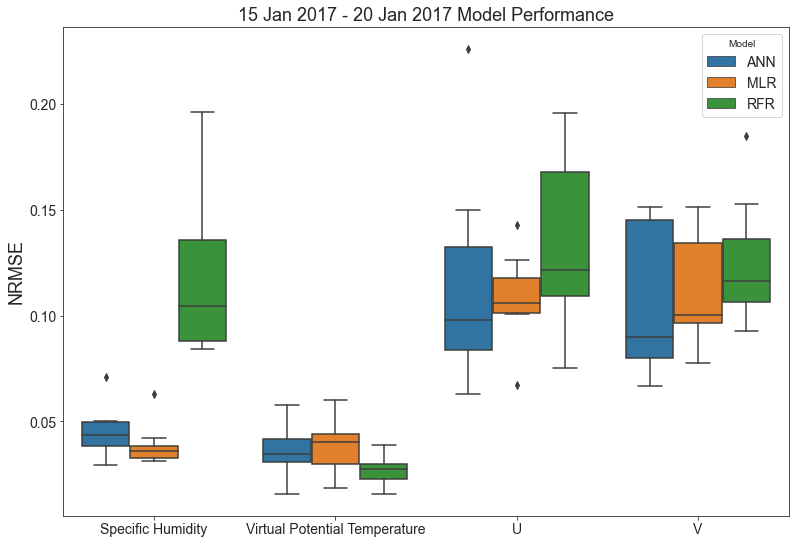

In [28]:
sns.set_style('ticks')
plt.rc('legend',fontsize=14)
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
sns.boxplot(x="Variable", y="NRMSE", hue="Model", data=flat15)
ax.set_xlabel("")
ax.set_title('15 Jan 2017 - 20 Jan 2017 Model Performance', fontsize=18)
ax.tick_params(labelsize=14)
ax.yaxis.label.set_size(18)
plt.savefig('1_15_Stats_3mod.png')

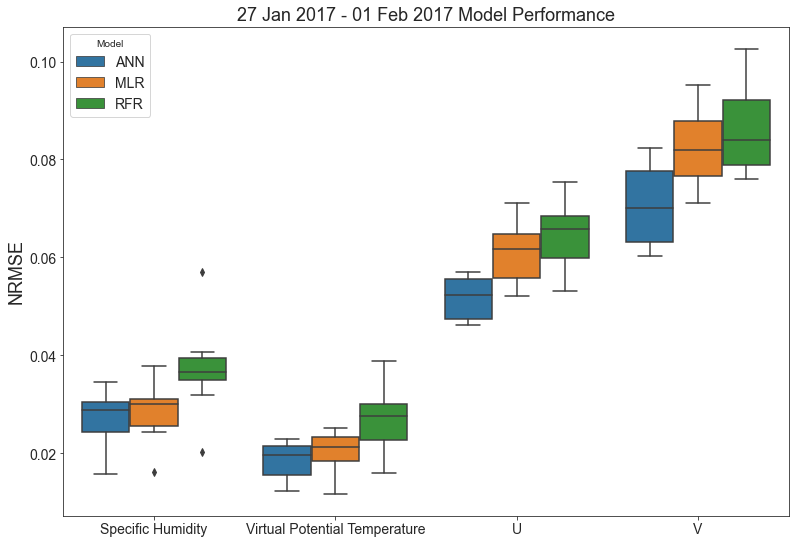

In [29]:
sns.set_style('ticks')
plt.rc('legend',fontsize=14)
fig, ax = plt.subplots()
fig.set_size_inches(13, 9)
sns.boxplot(x="Variable", y="NRMSE", hue="Model", data=flat27)
ax.set_xlabel("")
ax.set_title('27 Jan 2017 - 01 Feb 2017 Model Performance', fontsize=18)
ax.tick_params(labelsize=14)
ax.yaxis.label.set_size(18)
plt.savefig('1_27_Stats_3mod.png')